# Exercise 5 : Classification Tree

⚠️ Note: Some cells have been truncated by Jupyter. To see the full output, select the cell, press ESC, then press Shift+O (I've already done this for some cells, but depending on your machine, you may need to as do it as well)

Matric Num: U2022923F  
Name: Dyllon Sharad Gunawardhana  
Module: CZ1115  
Lab Group: FSP4  

## Preparation

In [1]:
# import essential libs
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Problem 1

Import the complete dataset “train.csv” in Jupyter : houseData = pd.read_csv('train.csv')
Use the following variables from the dataset in this problem : SalePrice and CentralAir

In [2]:
houseData = pd.read_csv('./train.csv')

centralAirDf = pd.DataFrame(houseData['CentralAir']) # Response
salePriceDf = pd.DataFrame(houseData['SalePrice']) # Predictor



### a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.

In [3]:
centralAirDf["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

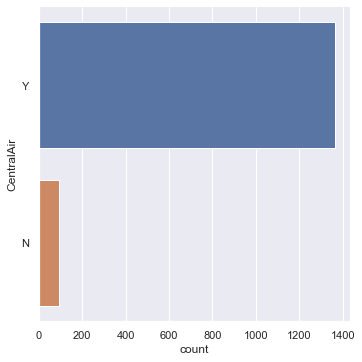

In [4]:
sb.catplot(y = "CentralAir", data = centralAirDf, kind = "count")

### b) Plot CentralAir against SalePrice using any appropriate bivariate plot to note the mutual relationship.

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

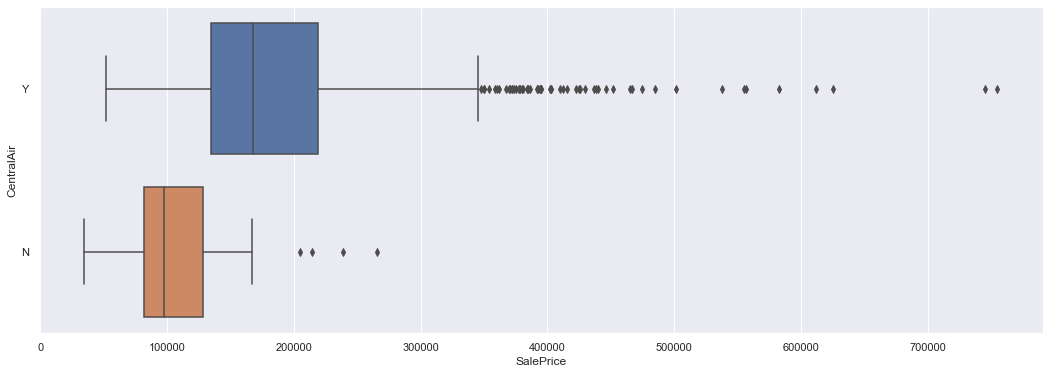

In [5]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([salePriceDf, centralAirDf], axis = 1).reindex(salePriceDf.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")



### c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [6]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [7]:
salePrice_train, salePrice_test, centralAir_train, centralAir_test = train_test_split(salePriceDf, centralAirDf, test_size = 0.246)

print("Train Data Size:", salePrice_train.shape, centralAir_train.shape)
print("Test Data Size:", salePrice_test.shape, centralAir_test.shape)

Train Data Size: (1100, 1) (1100, 1)
Test Data Size: (360, 1) (360, 1)


### e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using SalePrice.

In [8]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

dectree.fit(salePrice_train, centralAir_train)

DecisionTreeClassifier(max_depth=2)

### f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

[Text(334.8, 543.6, 'SalePrice <= 98150.0\ngini = 0.119\nsamples = 1100\nvalue = [70, 1030]\nclass = Y'),
 Text(167.4, 326.16, 'SalePrice <= 79250.0\ngini = 0.498\nsamples = 83\nvalue = [39, 44]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.417\nsamples = 27\nvalue = [19, 8]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.459\nsamples = 56\nvalue = [20, 36]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 145125.0\ngini = 0.059\nsamples = 1017\nvalue = [31, 986]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.145\nsamples = 344\nvalue = [27, 317]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.012\nsamples = 673\nvalue = [4, 669]\nclass = Y')]

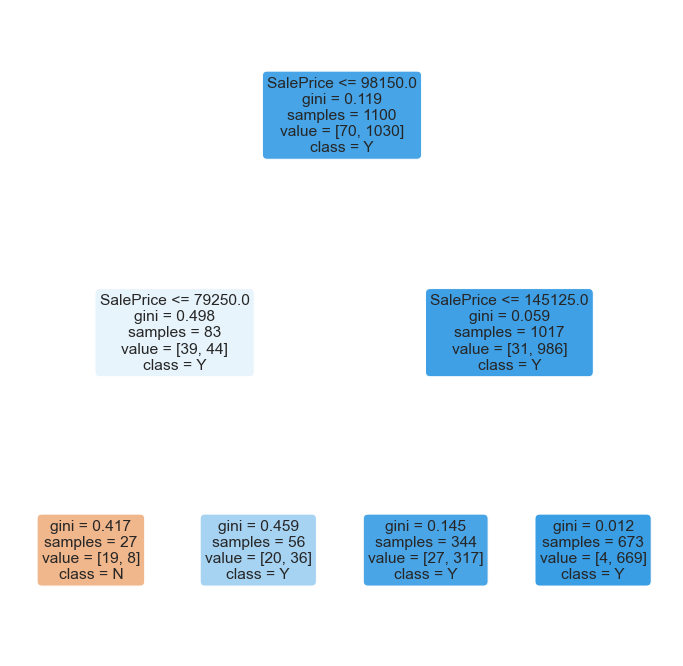

In [9]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])

# Using class names as given in part (e): "Y"/"N"
# Where N means no central air, and Y means it has central air

### g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

In [10]:
# Predicting
centralAir_train_pred = dectree.predict(salePrice_train)

<AxesSubplot:>

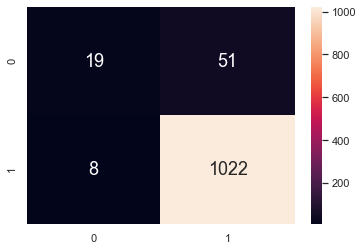

In [11]:
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralAir_train, centralAir_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

In [12]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(salePrice_train, centralAir_train))

print("True Positive rate \t\t:", confusion_matrix(centralAir_train, centralAir_train_pred)[0][0])
print("True Negative rate \t\t:", confusion_matrix(centralAir_train, centralAir_train_pred)[0][1])
print("False Positive rate \t\t:", confusion_matrix(centralAir_train, centralAir_train_pred)[1][0])
print("False Negative rate \t\t:", confusion_matrix(centralAir_train, centralAir_train_pred)[1][1])


Classification Accuracy 	: 0.9463636363636364
True Positive rate 		: 19
True Negative rate 		: 51
False Positive rate 		: 8
False Negative rate 		: 1022


### i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

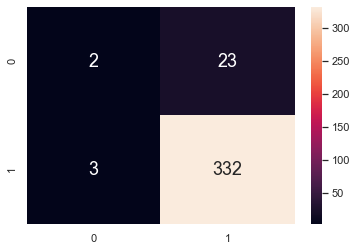

In [13]:
# Predicting
centralAir_test_pred = dectree.predict(salePrice_test)

# Confusion Matrix
sb.heatmap(confusion_matrix(centralAir_test, centralAir_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

In [14]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(salePrice_test, centralAir_test))

print("True Positive rate \t\t:", confusion_matrix(centralAir_test, centralAir_test_pred)[0][0])
print("True Negative rate \t\t:", confusion_matrix(centralAir_test, centralAir_test_pred)[0][1])
print("False Positive rate \t\t:", confusion_matrix(centralAir_test, centralAir_test_pred)[1][0])
print("False Negative rate \t\t:", confusion_matrix(centralAir_test, centralAir_test_pred)[1][1])


Classification Accuracy 	: 0.9277777777777778
True Positive rate 		: 2
True Negative rate 		: 23
False Positive rate 		: 3
False Negative rate 		: 332


## Problem 2

### Perform all the above steps on “CentralAir”againsteach of the variables“GrLivArea”,“OverallQual”,“YearBuilt”, one-by-one to perform individual Binary Classifications and obtain individual univariate Decision TreeModels in each case.Consider all predictor variables “GrLivArea”,“OverallQual”,“YearBuilt”as Numericin case of this classification problem.

In [15]:
# Basic Libs for problems 2 and 3
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [16]:
houseData = pd.read_csv('train.csv')

cntrlAir = pd.DataFrame(houseData['CentralAir'])  # Response
predictors = ['GrLivArea', 'OverallQual', 'YearBuilt'] # Predictor

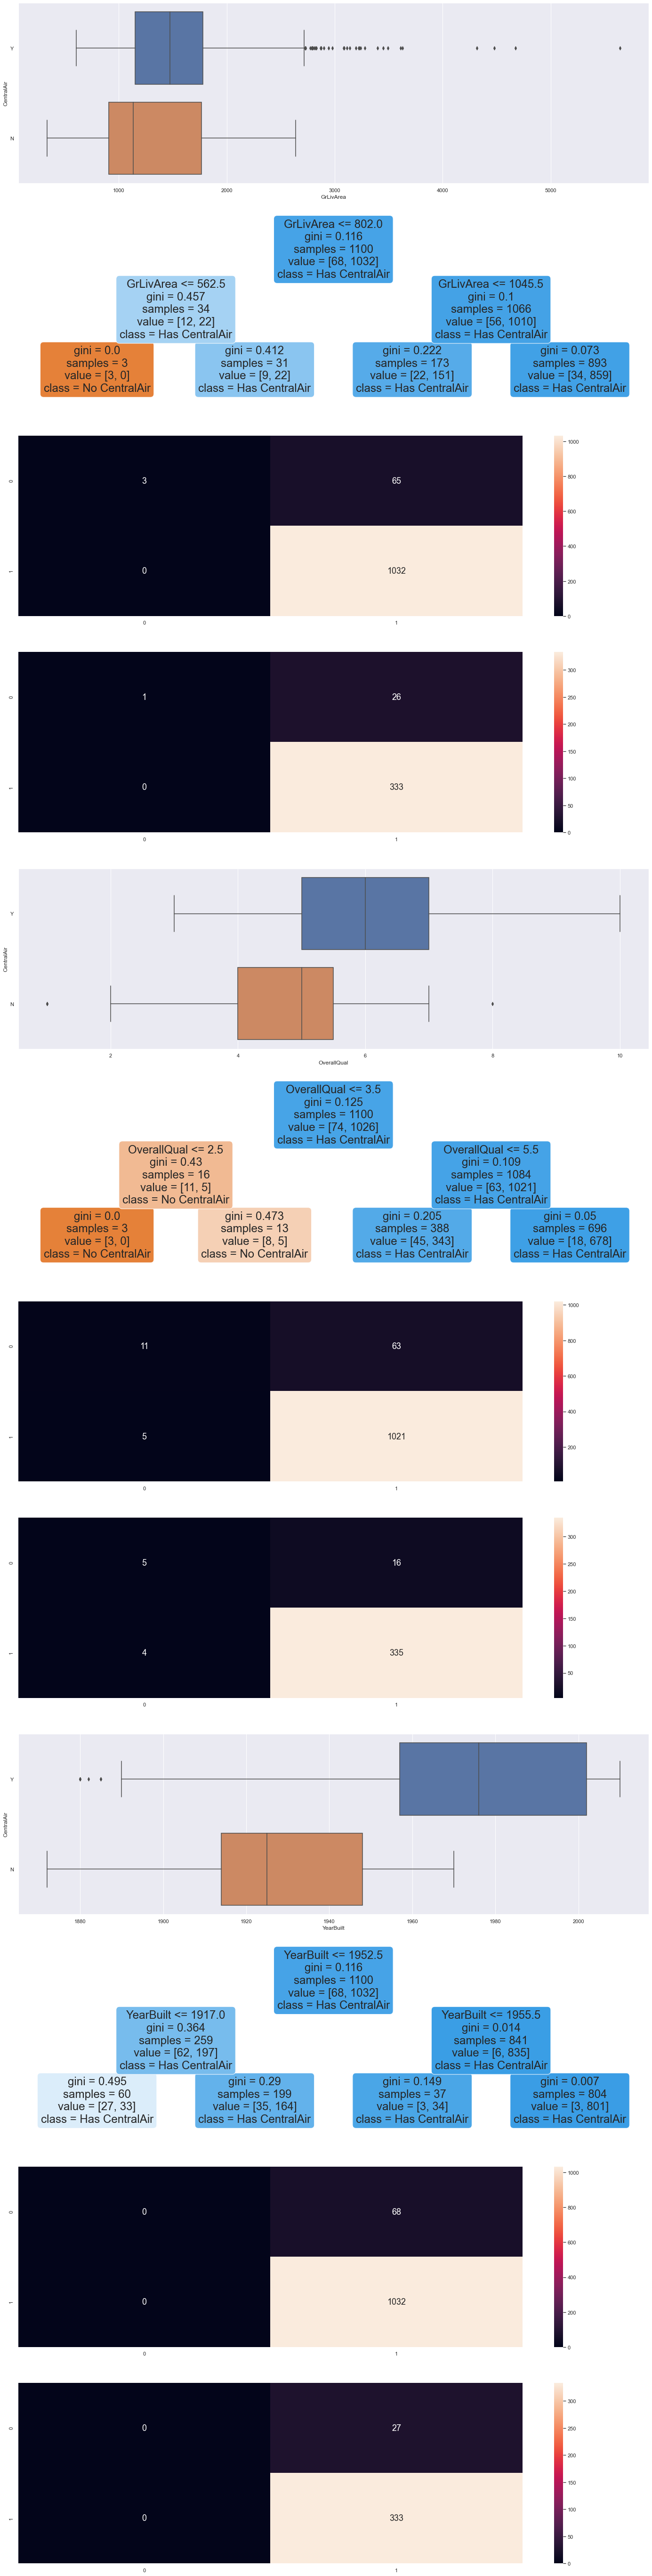

<Figure size 1296x432 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [17]:
f, axes = plt.subplots(12, 1, figsize=(24,100))

count = 0
for predictor in predictors:
    my_predictor = pd.DataFrame(houseData[predictor])      # Predictor
    
    # Let's create a joint dataframe by concat-ing the predictor and CentralAir
    concatDF = pd.concat([my_predictor, cntrlAir], axis = 1).reindex(my_predictor.index)
    # Joint Boxplot of Predictor Train against CentralAir Train
    f = plt.figure(figsize=(18, 6))
    sb.boxplot(x = predictor, y = "CentralAir", data = concatDF, orient = "h", ax=axes[count])
    count+=1
    
    # Split the  Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(my_predictor, cntrlAir, test_size = 0.246)
    
    # Create a dectree
    dectree = DecisionTreeClassifier(max_depth = 2)
    # Train the dectree model
    dectree.fit(X_train, y_train)

    f = plt.figure(figsize=(12,12))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=[predictor], 
          class_names=["No CentralAir","Has CentralAir"], ax=axes[count])
    count+=1
    
    # Predict whether has central air corresponding to sale price
    y_train_pred = dectree.predict(X_train)
    # Plot the two-way Confusion Matrix
    from sklearn.metrics import confusion_matrix
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[count])
    count+=1
    
    # Predict the correspondence betweeen  CentralAir and SalePrice
    y_test_pred = dectree.predict(X_test)
    # Plot the two-way Confusion Matrix
    from sklearn.metrics import confusion_matrix
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[count])
    count +=1

## Problem 3

### Compare and contrast the four models in terms of Classification Accuracy, True Positive Rate and False Positive Rate on both Train and Test Data to comment on which univariate classification tree you think is the best to predict “CentralAir”.

In [18]:
predictors = ['SalePrice','GrLivArea', 'OverallQual', 'YearBuilt']

for predictor in predictors:
    thePREDICTOR = pd.DataFrame(houseData[predictor])      # Predictor
    
    # Split the CentralAir-SalePrice Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(thePREDICTOR, cntrlAir, test_size = 0.246)
    
    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = 2)
    # Train the Decision Tree Classifier model
    dectree.fit(X_train, y_train)
    
    print("PREDICTOR:", predictor)
    
    print("- TRAIN DATA:")
    # Predict whether there's a correpondence between CentralAir and SalePrice
    y_train_pred = dectree.predict(X_train)

    # Print Classification Accuracy
    print("-- Classification Accuracy \t:", dectree.score(X_train, y_train))
    TN = confusion_matrix(y_train, y_train_pred)[0][0]
    FP = confusion_matrix(y_train, y_train_pred)[0][1]
    FN = confusion_matrix(y_train, y_train_pred)[1][0]
    TP = confusion_matrix(y_train, y_train_pred)[1][1]

    print("--- True Positive Rate = ", TP/(FN+TP) )
    print("--- False Positive Rate = ", FP/(TN+FP))
    
    print("- TEST DATA: ")
    # Predict whether has central air corresponding to sale price
    y_test_pred = dectree.predict(X_test)

    print("-- CLASSIFICATION ACCURACY \t:", dectree.score(X_test, y_test))

    TN = confusion_matrix(y_test, y_test_pred)[0][0]
    FP = confusion_matrix(y_test, y_test_pred)[0][1]
    FN = confusion_matrix(y_test, y_test_pred)[1][0]
    TP = confusion_matrix(y_test, y_test_pred)[1][1]


    print("--- True Positive Rate = ", TP/(FN+TP) )
    #print(">> True Negative Rate = ", TN/(TN+FP) )
    print("--- False Positive Rate = ", FP/(TN+FP))
    #print(">> False Negative Rate = ", FN/(FN+TP))

PREDICTOR: SalePrice
- TRAIN DATA:
-- Classification Accuracy 	: 0.9418181818181818
--- True Positive Rate =  0.9990281827016521
--- False Positive Rate =  0.8873239436619719
- TEST DATA: 
-- CLASSIFICATION ACCURACY 	: 0.9444444444444444
--- True Positive Rate =  0.9970238095238095
--- False Positive Rate =  0.7916666666666666
PREDICTOR: GrLivArea
- TRAIN DATA:
-- Classification Accuracy 	: 0.9409090909090909
--- True Positive Rate =  1.0
--- False Positive Rate =  0.9701492537313433
- TEST DATA: 
-- CLASSIFICATION ACCURACY 	: 0.9277777777777778
--- True Positive Rate =  1.0
--- False Positive Rate =  0.9285714285714286
PREDICTOR: OverallQual
- TRAIN DATA:
-- Classification Accuracy 	: 0.9390909090909091
--- True Positive Rate =  0.9922027290448343
--- False Positive Rate =  0.7972972972972973
- TEST DATA: 
-- CLASSIFICATION ACCURACY 	: 0.9416666666666667
--- True Positive Rate =  0.9970501474926253
--- False Positive Rate =  0.9523809523809523
PREDICTOR: YearBuilt
- TRAIN DATA:
-- Cla

### 📚 Conclusion
All 4 predictors have very high accuracy rates for both the training and testing data (>90%). We may need to look elsewhere to see which predictor model is the best

Looking at the true / false positive rates - we can see that OverallQual has the lowest false positive rates among the predictors, and yet has a very high true positive rate. **Hence, OverallQual is the best predictor!**